## Observations and Insights 

In [439]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import seaborn as sns
from sklearn import datasets

# Study data files
mouse_metadata_path = "Mouse_metadata.csv"
study_results_path = "Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study_df = pd.merge(mouse_metadata, study_results, on='Mouse ID')
mouse_study_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [440]:
# Checking the number of mice in the DataFrame.
len(mouse_study_df['Mouse ID'].unique())

249

In [441]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = mouse_study_df[mouse_study_df.duplicated(['Mouse ID','Timepoint'])]
duplicate_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [442]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_study_df = mouse_study_df.set_index('Mouse ID')
mouse_study_df = mouse_study_df.drop('g989')
mouse_study_df = mouse_study_df.reset_index()
mouse_study_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1875,z969,Naftisol,Male,9,30,25,63.145652,2
1876,z969,Naftisol,Male,9,30,30,65.841013,3
1877,z969,Naftisol,Male,9,30,35,69.176246,4
1878,z969,Naftisol,Male,9,30,40,70.314904,4


In [443]:
# Checking the number of mice in the clean DataFrame.
len(mouse_study_df['Mouse ID'].unique())

248

## Summary Statistics

In [444]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume 
# for each regimen

# This method is the most straightforward, creating multiple series and putting them all together at the end.
summ_stats = mouse_study_df['Tumor Volume (mm3)'] 

mean_stat = np.mean(summ_stats)
median_stat = np.median(summ_stats)
mode_stat = st.mode(summ_stats)
var_stat = np.var(summ_stats,ddof = 0)
sd_stat = np.std(summ_stats,ddof = 0)
sem_stat = np.std(summ_stats)/np.sqrt(len(summ_stats))

summ_stats_final = pd.DataFrame({"Mean": [mean_stat], "Median": [median_stat], "Mode": [mode_stat], "Variance": [var_stat], "Standard Deviation": [sd_stat], "SEM": [sem_stat]})
summ_stats_final

,Mean,Median,Mode,Variance,Standard Deviation,SEM
0,50.435293,48.933454,"([45.0], [248])",79.42064,8.911826,0.205536


## Bar Plots

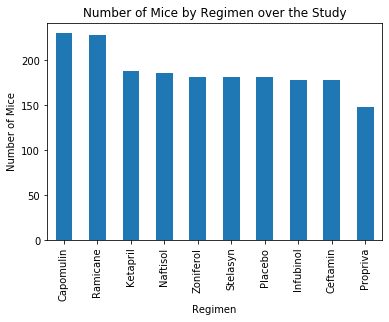

In [445]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.
bar_x_values = mouse_study_df.groupby('Drug Regimen')
bar_y_values = bar_x_values['Mouse ID'].count()
bar_y_values = bar_y_values.sort_values(ascending=False)
bar_plot = bar_y_values.plot(kind="bar", title="Number of Mice by Regimen over the Study", stacked=True)
bar_plot.set_xlabel("Regimen")
bar_plot.set_ylabel("Number of Mice")
plt.show()



([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text xticklabel objects>)

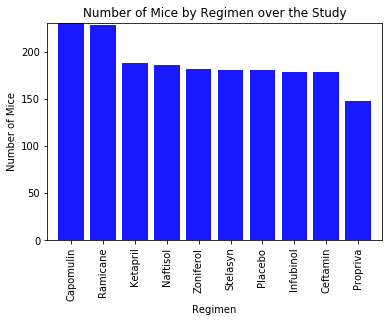

In [456]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.
bar_y_values.head(10)
xy = pd.DataFrame(bar_y_values)
xy = xy.reset_index(drop=False)
xy = xy.rename(columns={"Mouse ID":"Mice per Timepoint"}) 
xy = xy.sort_values(by=['Mice per Timepoint', 'Drug Regimen'], ascending=False)
bar_x_axis = xy['Drug Regimen'] 
bar_x_axis = bar_x_axis.reset_index(drop=True)
bar_y_axis = xy['Mice per Timepoint']
bar_y_axis = bar_y_axis.tolist()

bar_x_axis = bar_x_axis.tolist()
bar_x_axis

plt.bar(bar_x_axis, bar_y_axis, alpha=0.9, color="b", align="center")
plt.xlim(-0.75, len(bar_x_axis)-0.25)
plt.ylim(0, max(bar_y_axis)+0.4)
plt.title("Number of Mice by Regimen over the Study")
plt.xlabel("Regimen")
plt.ylabel("Number of Mice")
plt.xticks(rotation=90)



## Pie Plots

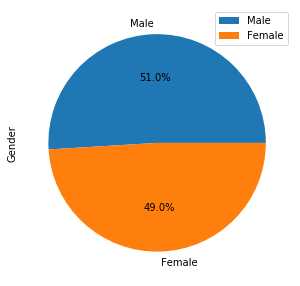

In [457]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
titles = mouse_study_df['Sex'].unique()
men = mouse_study_df.loc[mouse_study_df["Sex"] == "Male"]['Sex'].count()
women = mouse_study_df.loc[mouse_study_df["Sex"] == "Female"]['Sex'].count()
sex_counts = [men, women]
sex_data_z = pd.DataFrame({'Gender': [men, women]}, index=['Male', 'Female'])
pie_plot = sex_data_z.plot.pie(y='Gender',figsize=(5, 5),autopct="%1.1f%%")
pie_plot


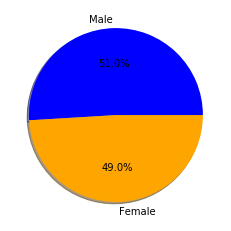

958

In [458]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = mouse_study_df['Sex'].unique()
male = mouse_study_df.loc[mouse_study_df["Sex"] == "Male"]['Sex'].count()
female = mouse_study_df.loc[mouse_study_df["Sex"] == "Female"]['Sex'].count()
gender_counts = [male, female]
colors = ["blue", "orange"]
explode = (0, 0)
plt.pie(gender_counts, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=0)
plt.show()
male

## Quartiles, Outliers and Boxplots

In [459]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens (Capomulin, Ramicane, infubinol, and ceftamin.)
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
four_treat = mouse_study_df.loc[(mouse_study_df['Drug Regimen'] == 'Capomulin') | (mouse_study_df['Drug Regimen'] == 'Ramicane') | 
                                  (mouse_study_df['Drug Regimen'] == 'Infubinol') | (mouse_study_df['Drug Regimen'] == 'Ceftamin')]

max_time = four_treat.groupby('Mouse ID')['Timepoint'].max()
max_time = pd.DataFrame(max_time)
final_t_vol = pd.merge(four_treat, max_time, on=["Mouse ID", "Timepoint"], how='right')
final_t_vol 

iqr_data = final_t_vol['Tumor Volume (mm3)']
quartiles = iqr_data.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"The lower quartile is: {lowerq}")
print(f"The upper quartile is: {upperq}")
print(f"The interquartile range is: {iqr}")
print(f"The the median is: {quartiles[0.5]} ")
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile is: 37.187743802499995
The upper quartile is: 59.930261755000004
The interquartile range is: 22.74251795250001
The the median is: 45.0 
Values below 3.0739668737499812 could be outliers.
Values above 94.04403868375002 could be outliers.


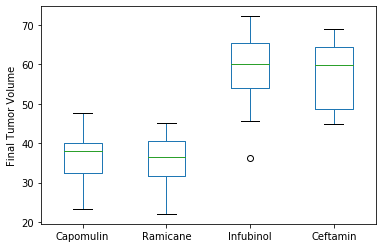

In [468]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
box_data = final_t_vol[['Drug Regimen','Tumor Volume (mm3)']]
box_data = box_data.reset_index(drop=True)

cap = box_data.loc[(box_data['Drug Regimen'] == "Capomulin")]
cap = cap.rename(columns={"Tumor Volume (mm3)":"Capomulin"}) 
cap = cap.drop(columns=['Drug Regimen'])
cap = cap.reset_index(drop=True)
ram = box_data.loc[(box_data['Drug Regimen'] == "Ramicane")]
ram = ram.rename(columns={"Tumor Volume (mm3)":"Ramicane"}) 
ram = ram.drop(columns=['Drug Regimen'])
ram = ram.reset_index(drop=True)
inf = box_data.loc[(box_data['Drug Regimen'] == "Infubinol")]
inf = inf.rename(columns={"Tumor Volume (mm3)":"Infubinol"}) 
inf = inf.drop(columns=['Drug Regimen'])
inf = inf.reset_index(drop=True)
cef = box_data.loc[(box_data['Drug Regimen'] == "Ceftamin")]
cef = cef.rename(columns={"Tumor Volume (mm3)":"Ceftamin"}) 
cef = cef.drop(columns=['Drug Regimen'])
cef = cef.reset_index(drop=True)

cap_ram = pd.concat([cap, ram], axis=1)
cr_inf = pd.concat([cap_ram, inf], axis=1)
drugs = pd.concat([cr_inf, cef], axis=1)

drugs.plot(kind='box')
plt.ylabel('Final Tumor Volume')
plt.show()


## Line and Scatter Plots

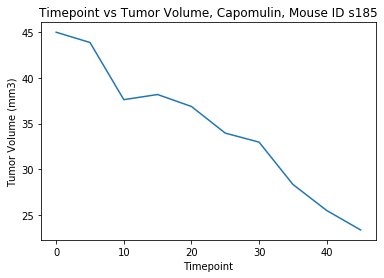

In [451]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
line_data = mouse_study_df.loc[(mouse_study_df['Drug Regimen'] == 'Capomulin') & (mouse_study_df['Mouse ID'] == 's185')]
line_data
plt.plot(line_data['Timepoint'], line_data['Tumor Volume (mm3)'])
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.title("Timepoint vs Tumor Volume, Capomulin, Mouse ID s185")
plt.show()

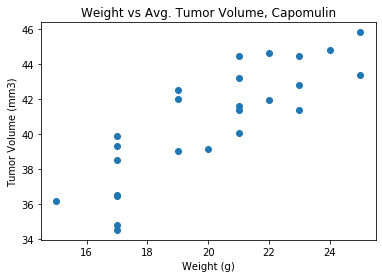

In [452]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen 

scatter_data = mouse_study_df.loc[mouse_study_df['Drug Regimen'] == 'Capomulin']
capo_mean = scatter_data.groupby(['Mouse ID']).mean()
plt.scatter(capo_mean['Weight (g)'],capo_mean['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.title("Weight vs Avg. Tumor Volume, Capomulin")
plt.show()


## Correlation and Regression

In [463]:
# Calculate the correlation coefficient and linear regression model, r2
# for mouse weight and average tumor volume for the Capomulin regimen


wei_vol = mouse_study_df.loc[(mouse_study_df['Drug Regimen'] == 'Capomulin')]                       
wei_vol = wei_vol.groupby(['Mouse ID']).mean()                             
wei_vol.head()              
                             
correlation = st.pearsonr(wei_vol['Weight (g)'], wei_vol['Tumor Volume (mm3)'])
print(f"The correlation coefficient between both factors is {round(correlation[0],2)}")


The correlation coefficient between both factors is 0.84


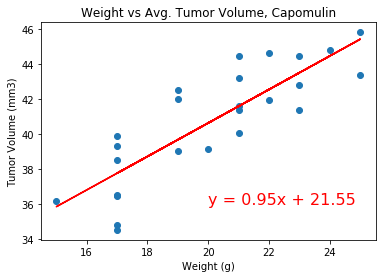

In [464]:
scatter_data = mouse_study_df.loc[mouse_study_df['Drug Regimen'] == 'Capomulin']
capo_means = scatter_data.groupby(['Mouse ID']).mean()
x_values = capo_means['Weight (g)']
y_values = capo_means['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values,"r-")
plt.annotate(line_eq, (20,36), fontsize=16, color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.title("Weight vs Avg. Tumor Volume, Capomulin")
plt.show()


#(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
#regress_values = x_values * slope + intercept
#line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#plt.scatter(x_values, y_values)
#plt.plot(x_values, regress_values,"r-")
#plt.annotate(line_eq, (20,40), fontsize=12, color="red")
#plt.xlabel('Weight (g)')
#plt.ylabel('Tumor Volume (mm3)')
#plt.show()